# Coordinate System Clarification

There is a comment in the code that indicates the coordinate system of the map is left handed while the vehicle coordinates are right handed. Lets figure out if this is the case.

The plan is to take the first ground truth position, first observation (relative to vehicle), and the map landmarks and see what rotation and translations are required to align the observations with the landmarks. 

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

position = pd.read_table("data/gt_data.txt", names=['x', 'y', 'theta'], delimiter=' ')
landmarks = pd.read_table("data/map_data.txt", names=['x', 'y', 'id'], delimiter='\t')
observations = pd.read_table("data/observation/observations_000001.txt", names=['x', 'y'], delimiter=' ')

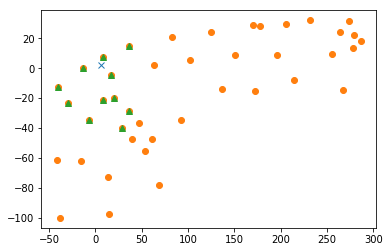

In [21]:
p = position.iloc[0]

plt.figure()
plt.plot(p.x, p.y, 'x')
plt.plot(landmarks.x, landmarks.y, 'o')
plt.plot(p.x + observations.x, p.y + observations.y, '^')
plt.show()

The first position is (6.2785, 1.9598, 0). The zero heading means the x axis of the map and vehicle are the same. Adding the first position to each observation will map directly to landmarks if the y axis of the car and map are aligned.

This is the case, so the map and car are using right handed coordinate systems. Lets now take the second position which has a nonzero heading and second observation to verify the rotation and translation operations needed to go from the vehicle coordinate system to map coordinate system. 

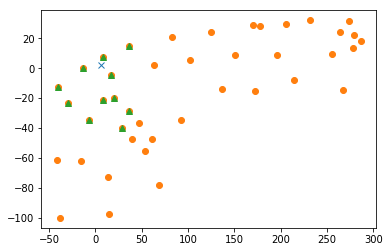

In [36]:
p2 = position.iloc[1]
obs2 = pd.read_table("data/observation/observations_000002.txt", names=['x', 'y'], delimiter=' ')

theta = p2.theta
x = obs2.x *  np.cos(theta) + obs2.y * -np.sin(theta)
y = obs2.x *  np.sin(theta) + obs2.y *  np.cos(theta)

plt.figure()
plt.plot(p2.x, p2.y, 'x')
plt.plot(landmarks.x, landmarks.y, 'o')
plt.plot(p2.x + x, p2.y + y, '^')
plt.show()